In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.cluster import KMeans
from skimage import morphology

In [2]:
# Make plots shown in the notebook rather than a separate window.
%matplotlib inline

In [3]:
# A Slice class that holds all of the information relevant to a slice.
class Slice:
    def __init__(self, name, greys, densities, points, voxel_size):
        self.image = name + ".tif"
        self.label = name + "_label.tif"
        self.skel = name + "_skel.tif"
        self.greys = greys
        self.densities = densities
        self.points = points
        self.voxel_size = voxel_size

In [4]:
# Define the Slice objects for each slice in the calcification directory. The greyscale
# and density values were provided by Dr Kenneth Johnson from the Natural History Museum.
RS0030_1 = Slice(name="calcification/RS0030_1_yz",
               greys=[49355.9941176471, 44104.6882352941, 39821.1352941176, 32732.8294117647, 26064.9705882353, 21192.1588235294],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[1140, 164], [1250, 164]],
               voxel_size=0.0762383788824081)

RS0030_2 = Slice(name="calcification/RS0030_1_yz",
               greys=[49355.9941176471, 44104.6882352941, 39821.1352941176, 32732.8294117647, 26064.9705882353, 21192.1588235294],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[1061, 326], [1090, 430]],
               voxel_size=0.0762383788824081)

RS0030_3 = Slice(name="calcification/RS0030_1_yz",
               greys=[49355.9941176471, 44104.6882352941, 39821.1352941176, 32732.8294117647, 26064.9705882353, 21192.1588235294],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[876, 282], [924, 372]],
               voxel_size=0.0762383788824081)

RS0116_1 = Slice(name="calcification/RS0116_0414",
               greys=[42451.8791946309, 38889.6577181208, 35743.7852348993, 30638.1208053691, 25961.932885906, 23126.5771812081],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[1355, 1334], [1437, 1411]],
               voxel_size=0.0956196114420891)

RS0116_2 = Slice(name="calcification/RS0116_0414",
               greys=[42451.8791946309, 38889.6577181208, 35743.7852348993, 30638.1208053691, 25961.932885906, 23126.5771812081],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[1280, 1427], [1360, 1520]],
               voxel_size=0.0956196114420891)

RS0116_3 = Slice(name="calcification/RS0116_0414",
               greys=[42451.8791946309, 38889.6577181208, 35743.7852348993, 30638.1208053691, 25961.932885906, 23126.5771812081],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[669, 1512], [623, 1606]],
               voxel_size=0.0956196114420891)

RS0128_1 = Slice(name="calcification/RS0128_yz_451",
               greys=[36217.5648854962, 32658.786259542, 29625.2824427481, 24806.0534351145, 20296.3053435114, 17492.6106870229],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[630, 346], [648, 244]],
               voxel_size=0.103974558413029)

RS0128_2 = Slice(name="calcification/RS0128_yz_451",
               greys=[36217.5648854962, 32658.786259542, 29625.2824427481, 24806.0534351145, 20296.3053435114, 17492.6106870229],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[763, 468], [720, 566]],
               voxel_size=0.103974558413029)

RS0128_3 = Slice(name="calcification/RS0128_yz_451",
               greys=[36217.5648854962, 32658.786259542, 29625.2824427481, 24806.0534351145, 20296.3053435114, 17492.6106870229],
               densities=[1.922, 1.773, 1.654, 1.445, 1.266, 1.13],
               points=[[563, 411], [576, 522]],
               voxel_size=0.103974558413029)

In [5]:
# Define which scan will be analysed.
s = RS0128_3

In [6]:
# Read in image and skeleton
image = cv.imread(s.image, -1)
label = cv.imread(s.skel, -1)

In [7]:
# Plot the calibration density values provided for the scan.
# plt.plot(s.greys, s.densities, marker="x")

In [8]:
# Define a simple quadratic equation for the curve_fit() method to use.
def quad(x, a, b, c):
    return a * (x ** 2) + (b * x) + c

# Use the scipy curve_fit() method to fit the quadratic function to the data.
params, params_covariance = optimize.curve_fit(quad, s.greys, s.densities)

In [9]:
# Plot the fit curve against the original data.
# fake = [50000, 40000, 30000, 20000]
# guesses = [quad(fake[i], params[0], params[1], params[2]) for i in range(len(fake))]

# plt.plot(fake, guesses)
# plt.plot(s.greys, s.densities, marker="x")

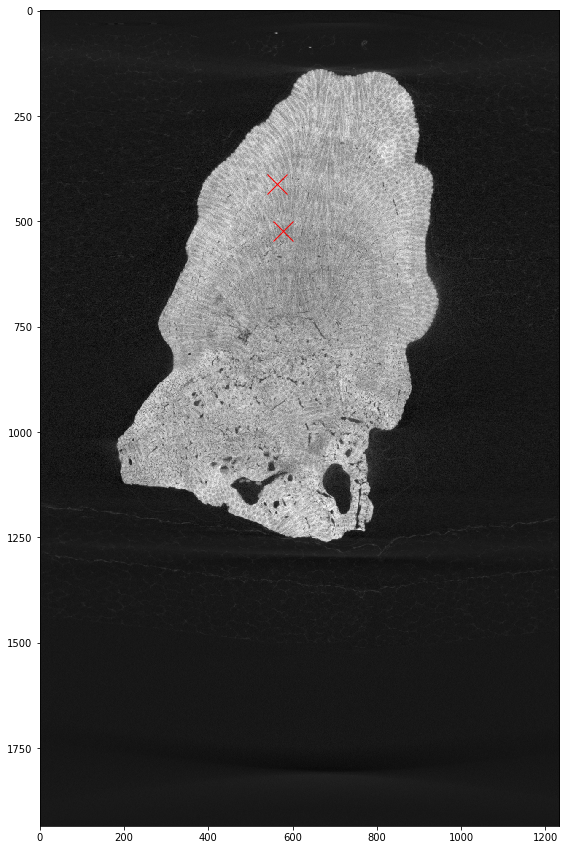

In [10]:
fig, ax = plt.subplots(figsize=(15,15))

a, b = s.points

# Visualise the points chosen
ax.imshow(image, cmap="gray")
ax.plot(a[0], a[1], marker="x", markersize=20, color="red")
ax.plot(b[0], b[1], marker="x", markersize=20, color="red")

plt.show()

In [11]:
# Returns the point half way between the two points provided
def center_point(x, y):
    return [(x[0] + y[0]) / 2, (x[1] + y[1]) / 2]

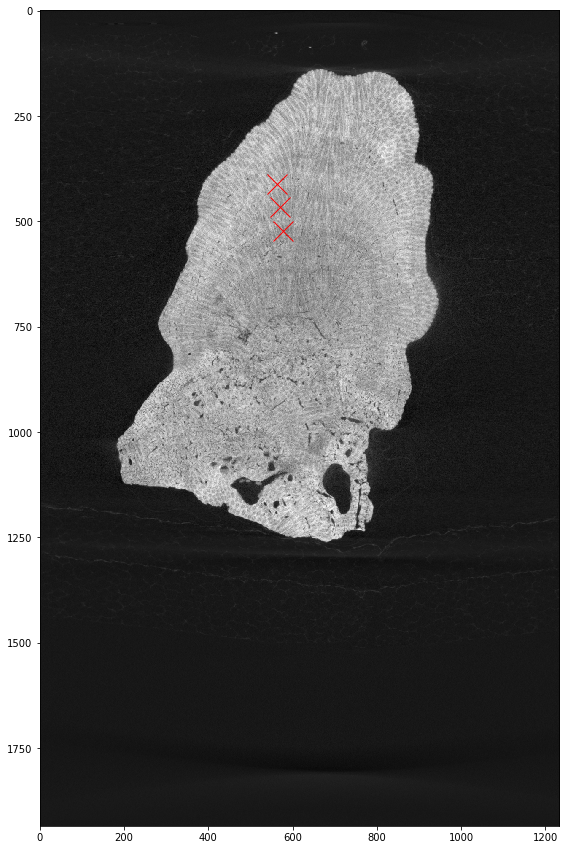

In [12]:
fig, ax = plt.subplots(figsize=(15,15))

# Find the center point
c = center_point(a, b)

# Visualise the center point
ax.imshow(image, cmap="gray")
ax.plot(a[0], a[1], marker="x", markersize=20, color="red")
ax.plot(b[0], b[1], marker="x", markersize=20, color="red")
ax.plot(c[0], c[1], marker="x", markersize=20, color="red")

plt.show()

In [13]:
# Find the vector from the firs point to the second.
vector = [b[1] - a[1], b[0] - a[0]]

In [14]:
# Find angle between the line drawn by the two points and the x axis
angle_r = np.arctan2(*vector)
angle_d = np.degrees(angle_r)

print(angle_d)

83.32011393677746


In [15]:
# Rotate a point around an origin point by a given angle
def rotate(p, origin=(0, 0), angle=0):
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

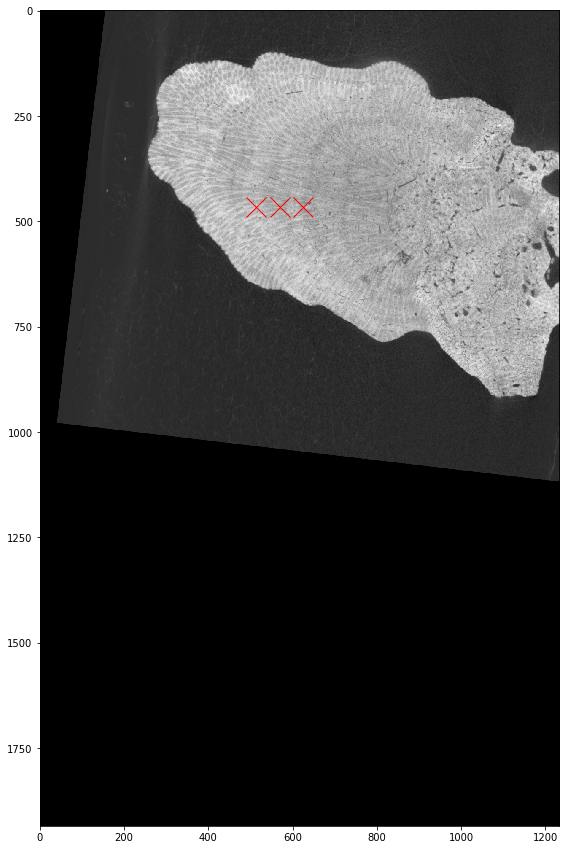

In [16]:
# Rotate the image around the central point
matrix = cv.getRotationMatrix2D(center=tuple(c), angle=angle_d, scale=1)
rotated_image = cv.warpAffine(src=image, M=matrix, dsize=image.shape[::-1])
rotated_label = cv.warpAffine(src=label, M=matrix, dsize=label.shape[::-1])

# Rotate the two points too.
a_r, b_r = rotate([a, b], origin=c, angle=-angle_r)

fig, ax = plt.subplots(figsize=(15,15))

# Visualise the rotated image and points
ax.imshow(rotated_image, cmap="gray")
ax.plot(a_r[0], a_r[1], marker="x", markersize=20, color="red")
ax.plot(b_r[0], b_r[1], marker="x", markersize=20, color="red")
ax.plot(  c[0],   c[1], marker="x", markersize=20, color="red")

plt.show()

In [17]:
# Print the newly rotated points.
print(a_r, b_r, c)

[513.62066572 466.5       ] [625.37933428 466.5       ] [569.5, 466.5]


In [18]:
# Define how wide the rectangular area should be.
box_width = 20

# Crop the image and the label to the rectangular area.
cropped_image = rotated_image[int(c[1] - box_width):int(c[1] + box_width) :, int(a_r[0]):int(b_r[0])]
cropped_label = rotated_label[int(c[1] - box_width):int(c[1] + box_width) :, int(a_r[0]):int(b_r[0])]
_, cropped_label = cv.threshold(cropped_label, 50, 255, cv.THRESH_BINARY)

# Find any very small boundaries that should be removed.
processed = morphology.remove_small_objects(cropped_label.astype(bool), min_size=6, connectivity=2).astype(int)
# black out pixels
cropped_label[np.where(processed == 0)] = 0

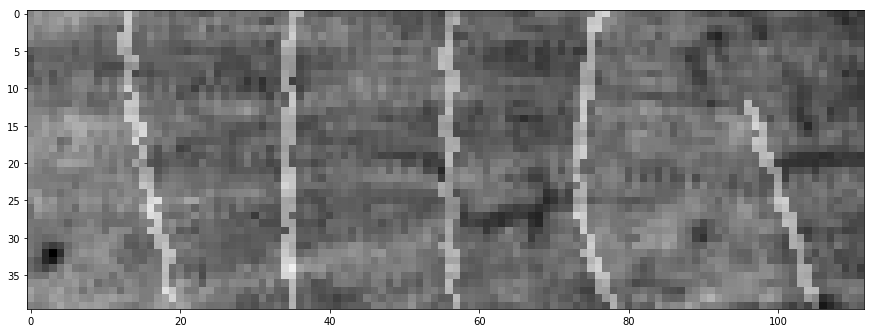

In [19]:
fig, ax = plt.subplots(figsize=(15,15))

# Visualise the rectangular area.
ax.imshow(cropped_image, cmap="gray")
ax.imshow(cropped_label, cmap="gray", alpha=0.3)

plt.show()

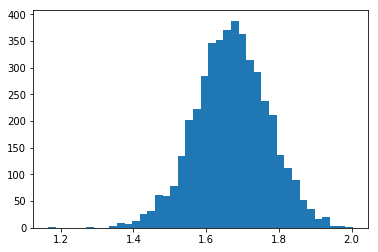

In [20]:
# Visualise the histogram of the density values present in the rectangular area.
c_image_densities = np.zeros(cropped_image.shape)

for y in range(cropped_image.shape[0]):
    for x in range(cropped_image.shape[1]):
        c_image_densities[y, x] = quad(cropped_image[y, x], *params)

heights, densities, _ = plt.hist(c_image_densities.flatten(), bins=40)

In [21]:
# Calculate the density error. Do so by finding a mean density for each horizontal
# line of pixels and then find the standard deviation of these means.
density_means = np.zeros(box_width * 2)

for y in range(box_width * 2):
    split = c_image_densities[y, :]
    density_means[y] = np.mean(split)

density_error = np.std(density_means)
mean_density = np.mean(density_means)
    
print(density_error)
print(mean_density)
print(list(density_means))

0.026230294324888163
1.6703263956642815
[1.65997661957756, 1.6768729424980247, 1.675408501278701, 1.6618875414026593, 1.6454302869278763, 1.6139706192149565, 1.6220529115548743, 1.614777742668517, 1.6179246611799574, 1.6399093785513281, 1.6505989805827517, 1.6553727255873387, 1.669644208553013, 1.674873781735491, 1.6710146191783781, 1.6791076434671706, 1.671646493505681, 1.6738008549591883, 1.6720708042450123, 1.6462197057193835, 1.6374243475390275, 1.6609224419755884, 1.6846224125043254, 1.6965942571023576, 1.6881489698866108, 1.6825111262365497, 1.6799531468122306, 1.6628001882332302, 1.6619297830827926, 1.6717295039132734, 1.6745205320550107, 1.698416457254058, 1.6932884883159558, 1.6835700510935376, 1.7100457122370376, 1.7114256139853998, 1.7094057990243812, 1.7108779590010854, 1.716647110244957, 1.6856609036859855]


In [22]:
# Finds the average distance between two boundaries.
def euclidean(shape, boundaries):
    euclidean = np.zeros(shape)
    for i in range(len(boundaries) - 1):
        for j in boundaries[i]:
            euclidean[j] = np.inf
            for k in boundaries[i + 1]:
                distance = np.linalg.norm(np.array(j) - np.array(k))
                euclidean[j] = min(euclidean[j], distance)
    return euclidean

In [23]:
# Use the OpenCV connectedComponents() method to label the individual boundaries.
num_labels, labels_image = cv.connectedComponents(cropped_label)

for i in range(num_labels):
    if np.sum(labels_image == i) < 15:
        cropped_label[labels_image == i] = 0
        labels_image[labels_image == i] = 0

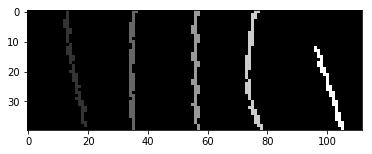

In [24]:
plt.imshow(labels_image, cmap='gray')

In [25]:
labels = []
yearly_labels = []

# Sort the boundaries with the growth surface first.
for x in range(labels_image.shape[1]-1, -1, -1):
    for y in range(labels_image.shape[0]):
        label = labels_image[y, x]
        if cropped_label[y, x] != 0 and label not in labels:
            labels.append(label)

print(labels)

for i in range(len(labels)):
    if i % 2 == 0:
        yearly_labels.append(labels[i])
        
print(yearly_labels)

boundaries = {}

for i in range(len(yearly_labels)):
    boundaries[i] = []

# Save the boundary pixels into a boundaries dictionary.
for y in range(labels_image.shape[0]):
    for x in range(labels_image.shape[1]):
        label = labels_image[y, x]
        if label in yearly_labels:
            index = yearly_labels.index(label)
            boundaries[index].append((y, x))
        
euclidean_image = euclidean(cropped_label.shape, boundaries)

[5, 4, 3, 2, 1]
[5, 3, 1]


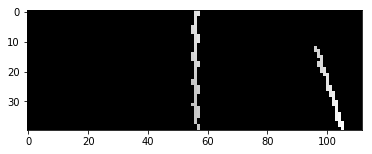

In [26]:
plt.imshow(euclidean_image, cmap='gray')

In [27]:
raw_distances = []
# Find the average distance in pixels between each of the boundaries.
averages = np.zeros(len(yearly_labels) - 1)
for i in range(len(yearly_labels) - 1):
    for j in boundaries[i]:
        averages[i] += + euclidean_image[j]
        raw_distances.append(euclidean_image[j])
    averages[i] /= len(boundaries[i])

# Calculate the extension rate standard error
extension_error = (np.std(raw_distances) / np.sqrt(len(raw_distances))) * s.voxel_size

print(averages)
print(raw_distances)

[43.7220865  39.48875624]
[39.05124837953327, 39.11521443121589, 40.11234224026316, 40.11234224026316, 40.049968789001575, 41.048751503547585, 41.012193308819754, 40.0, 41.0, 40.0, 41.0, 41.012193308819754, 42.01190307520001, 41.048751503547585, 42.04759208325728, 42.1070065428546, 43.104524124504614, 43.104524124504614, 43.04648650006177, 43.01162633521314, 43.0, 44.0, 43.0, 44.0, 44.0, 45.0, 44.01136216933077, 45.0111097397076, 45.044422518220834, 45.044422518220834, 46.04345773288535, 45.0111097397076, 46.010868281309364, 46.0, 46.0, 46.0, 47.0, 46.0, 47.0, 46.010868281309364, 47.01063709417264, 47.01063709417264, 48.010415536631214, 47.0, 48.0, 48.0, 42.42640687119285, 43.41658669218482, 42.2965719651132, 43.289721643826724, 42.190046219457976, 42.1070065428546, 42.04759208325728, 41.012193308819754, 42.01190307520001, 41.0, 41.97618372363071, 40.792156108742276, 41.773197148410844, 41.593268686170845, 42.579337712087536, 41.43669871020132, 42.42640687119285, 41.30375285612676, 42.

In [28]:
# Calculate the linear extension rate and the calcification rate.
linear_extension_mm = np.mean(averages) * s.voxel_size
calcification = (linear_extension_mm / 10) * mean_density

# Calculate the calcification rate standard error
calcification_error = np.sqrt((density_error / mean_density)**2 + (extension_error / linear_extension_mm)**2)

print(f"Density: {mean_density:.2f} " + u"\u00B1" + f" {density_error:.2f} g cm^(-3)")
print(f"Linear extension rate: {linear_extension_mm:.2f} " + u"\u00B1" + f" {extension_error:.2f} mm y^(-1)")
print(f"Calcification rate: {calcification:.2f} " + u"\u00B1" + f" {calcification_error:.2f} g cm^(-2) y^(-1)")

Density: 1.67 ± 0.03 g cm^(-3)
Linear extension rate: 4.33 ± 0.03 mm y^(-1)
Calcification rate: 0.72 ± 0.02 g cm^(-2) y^(-1)
